In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("onlinefoods.csv")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [8]:
data.shape

(388, 13)

In [9]:
data[data.duplicated()]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
43,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
48,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,Yes,Negative,Yes
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
52,24,Male,Single,Student,No Income,Post Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
60,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [10]:
data.duplicated().sum()

103

In [11]:
data[data.duplicated()].count()

Age                           103
Gender                        103
Marital Status                103
Occupation                    103
Monthly Income                103
Educational Qualifications    103
Family size                   103
latitude                      103
longitude                     103
Pin code                      103
Output                        103
Feedback                      103
Unnamed: 12                   103
dtype: int64

In [12]:
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


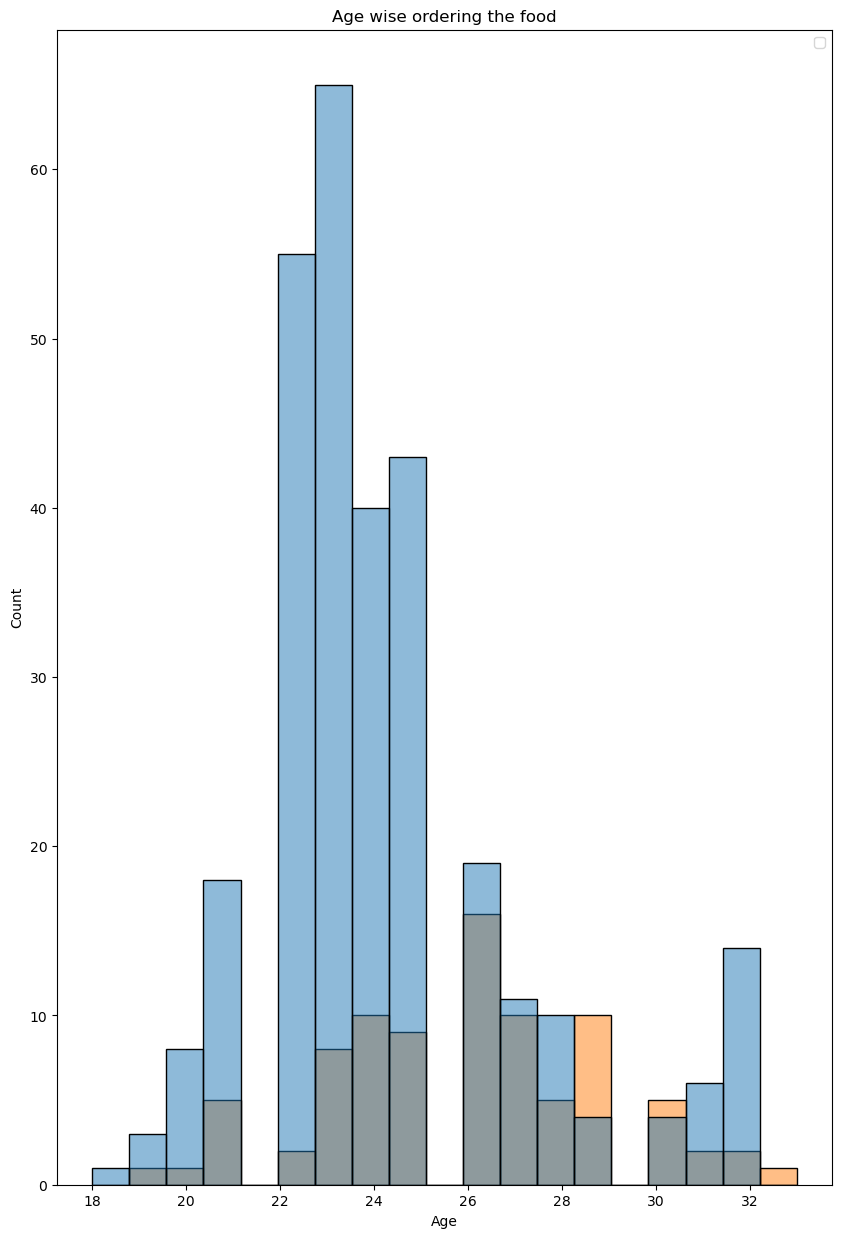

In [13]:
plt.figure(figsize=(10,15))

sns.histplot(x ='Age', hue='Output', color='skyblue' , data=data)
plt.title('Age wise ordering the food')
plt.x_label = ("Age")
plt.y_label = ("Output")
plt.legend()
plt.show()

In [14]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [15]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [17]:
data.isnull().sum()*100/len(data)

Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
Unnamed: 12                   0.0
dtype: float64

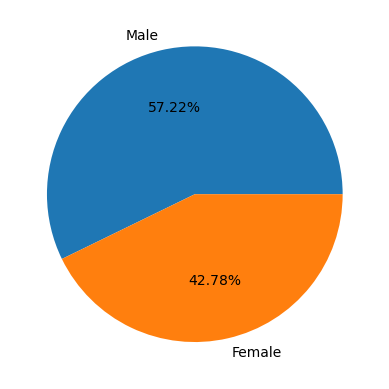

In [18]:
plt.pie(data.Gender.value_counts(dropna=False),labels=data.Gender.value_counts(dropna=False).index,autopct='%.2f%%')
plt.show()

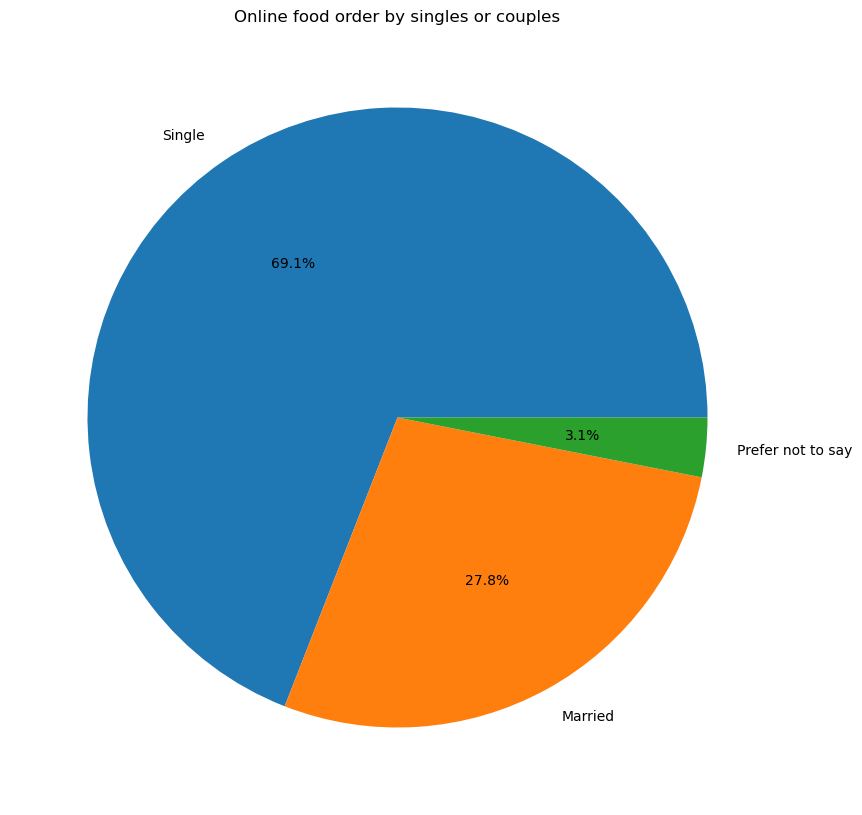

In [19]:
counts = data["Marital Status"].value_counts()
plt.figure(figsize=(10,15))
plt.pie(counts,labels = counts.index,autopct='%1.1f%%')
plt.title("Online food order by singles or couples")
plt.show()

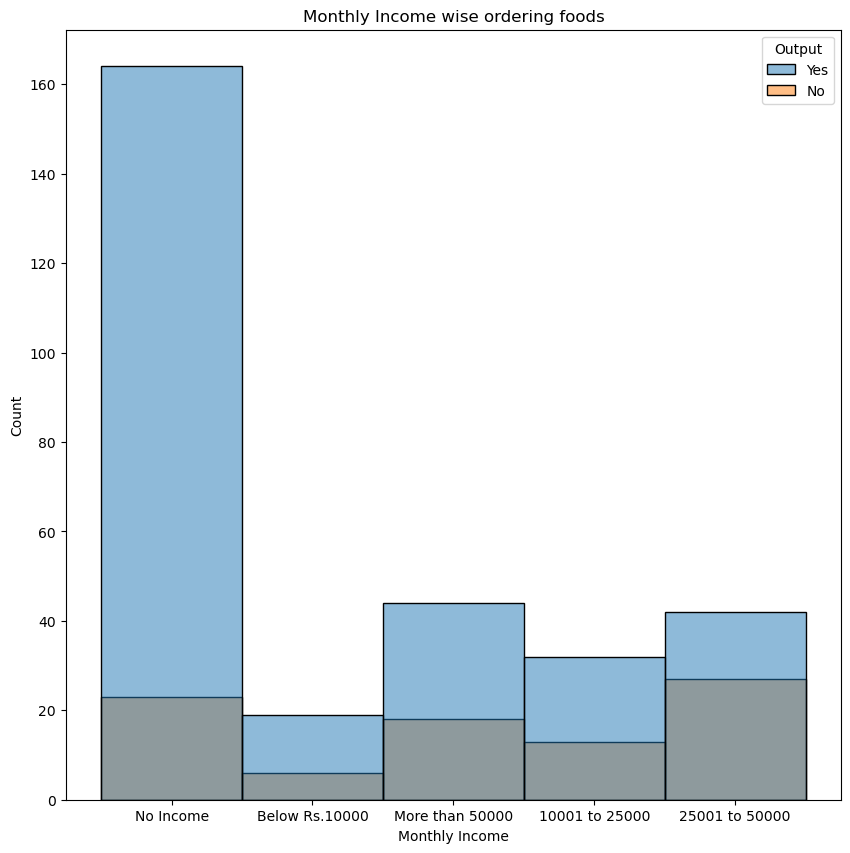

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'Monthly Income' , hue = "Output" ,data = data ,color = "skyblue")
plt.title("Monthly Income wise ordering foods")
plt.x_label = "Mothly Income"
plt.y_label = "Output"
plt.show()

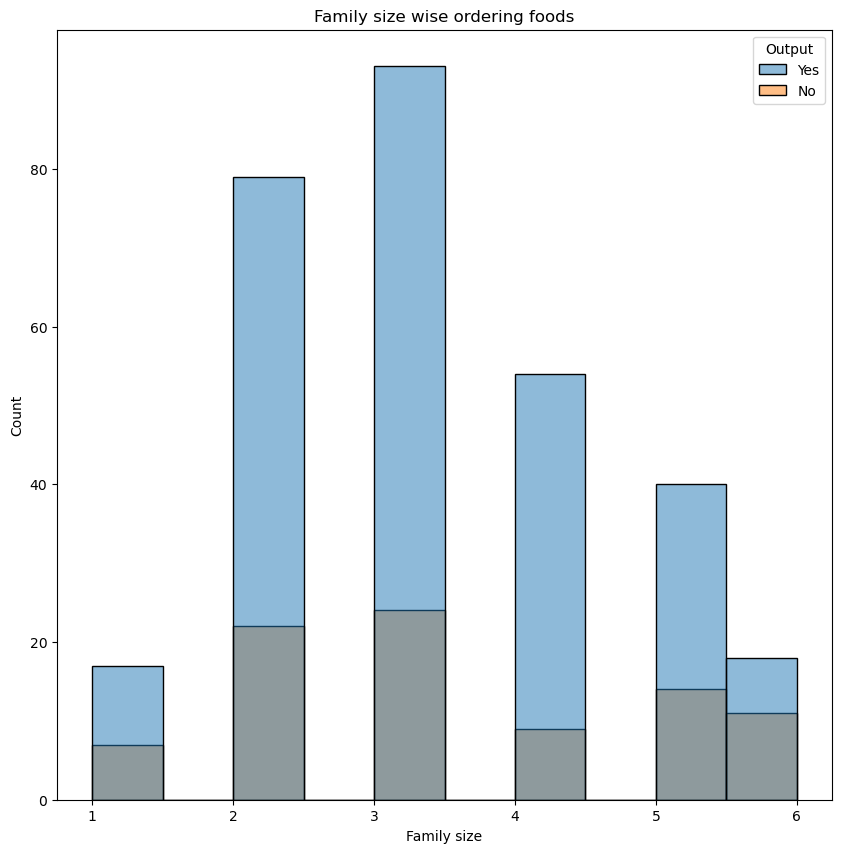

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'Family size' , hue = "Output" ,data = data ,color = "skyblue")
plt.title("Family size wise ordering foods")
plt.x_label = "Family size"
plt.y_label = "Output"
plt.show()

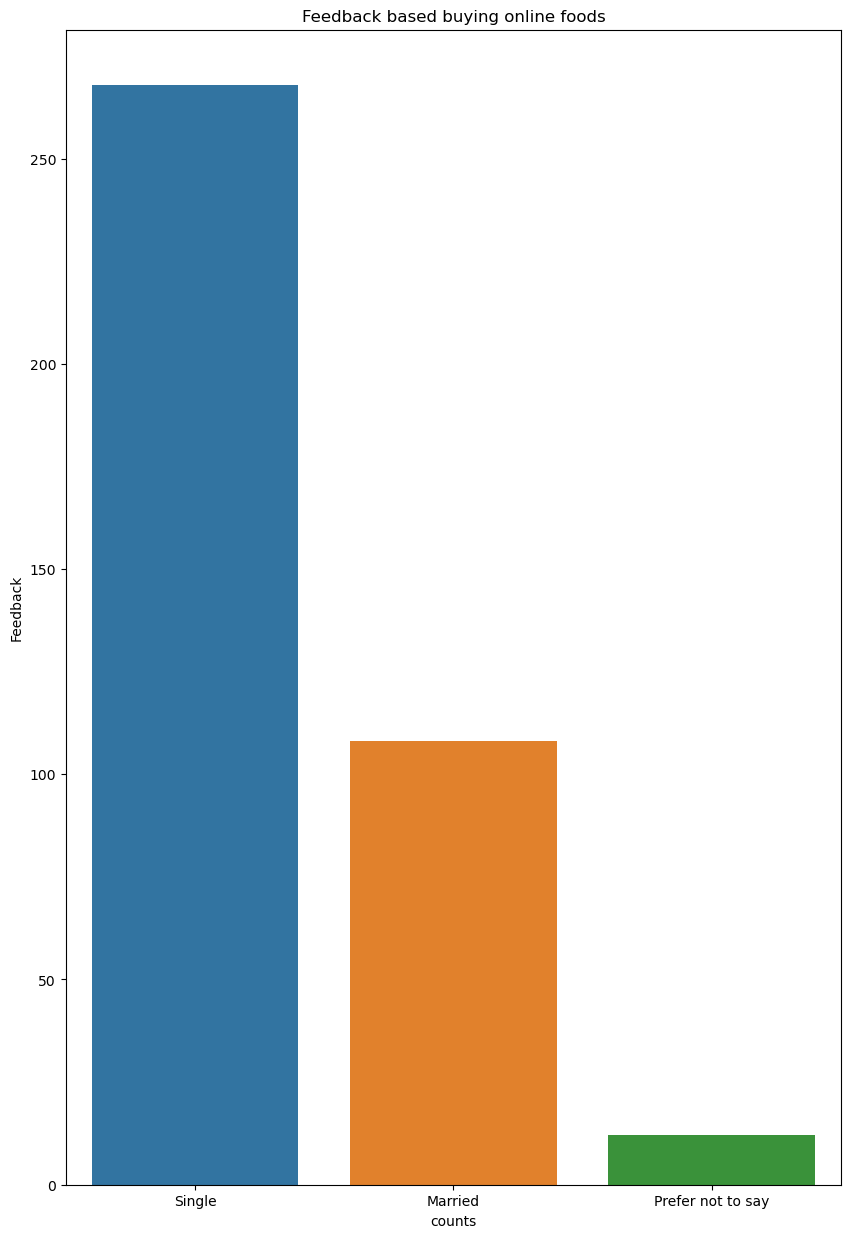

In [22]:
count= data["Feedback"].value_counts()
plt.figure(figsize=(10,15))
sns.barplot(x = counts.index , y= counts.values)
plt.xlabel("counts")
plt.ylabel("Feedback")
plt.title("Feedback based buying online foods")
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [24]:
data = data.drop(labels = "Unnamed: 12", axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [25]:
print('Gender count:' , data["Gender"].value_counts())
print("------------------")
print('Marital Status count:' , data["Marital Status"].value_counts())
print("------------------")
print('Monthly Income count:' , data["Monthly Income"].value_counts())
print("------------------")
print('Family size count:' , data["Family size"].value_counts())
print("------------------")
print('Output count:' , data["Output"].value_counts())
print("------------------")
print('Feedback count:', data["Feedback"].value_counts())

Gender count: Gender
Male      222
Female    166
Name: count, dtype: int64
------------------
Marital Status count: Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64
------------------
Monthly Income count: Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64
------------------
Family size count: Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64
------------------
Output count: Output
Yes    301
No      87
Name: count, dtype: int64
------------------
Feedback count: Feedback
Positive     317
Negative      71
Name: count, dtype: int64


In [26]:
print(data["Gender"].unique())
print(data["Marital Status"].unique())
print(data["Monthly Income"].unique())
print(data["Output"].unique())
print(data["Feedback"].unique())
print(data["Occupation"].unique())
print(data["Educational Qualifications"].unique())

['Female' 'Male']
['Single' 'Married' 'Prefer not to say']
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
['Yes' 'No']
['Positive' 'Negative ']
['Student' 'Employee' 'Self Employeed' 'House wife']
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']


In [27]:
data['Gender'] = data['Gender'].map({'Male':0 , 'Female':1})
data['Marital Status']=data["Marital Status"].map({'Single':0,'Married':1,'Prefer not to say':3})
data["Monthly Income"] = data["Monthly Income"].map({'No Income':0,'Below Rs.10000':5000,'More than 50000':80000,'10001 to 25000':10400})
data["Occupation"] = data["Occupation"].map({'Student':0,'Employee':1,'Self Employeed':2,'House wife':3})
data["Educational Qualifications"] = data["Educational Qualifications"].map({'Post Graduate':0,'Graduate':1,'Ph.D':2,'Uneducated':3,'School':4})
data["Output"] = data["Output"].map({'Yes':1,'No':0,})
data["Feedback"] = data["Feedback"].map({'Positive':1,'Negative ':0})

In [28]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,1,0,0,0.0,0,4,12.9766,77.5993,560001,1,1
1,24,1,0,0,5000.0,1,3,12.9770,77.5773,560009,1,1
2,22,0,0,0,5000.0,0,3,12.9551,77.6593,560017,1,0
3,22,1,0,0,0.0,1,6,12.9473,77.5616,560019,1,1
4,22,0,0,0,5000.0,0,4,12.9850,77.5533,560010,1,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              319 non-null    float64
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    int64  
 11  Feedback                    388 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 36.5 KB


In [43]:
data.isna().sum()

Age                            0
Gender                         0
Marital Status                 0
Occupation                     0
Monthly Income                69
Educational Qualifications     0
Family size                    0
latitude                       0
longitude                      0
Pin code                       0
Output                         0
Feedback                       0
dtype: int64

In [44]:
data['Monthly Income'].fillna(data['Monthly Income'].median(),inplace=True)

In [45]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [46]:
data.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 4
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [47]:
# split into independent / dependent
x = data.drop(['Output'],axis = 1)
y = data['Output']

In [48]:
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size = 0.2,random_state=34)

In [49]:
# feature scaler
scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [50]:
# model traing
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled , y_train)


LogisticRegression(max_iter=1000)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [59]:
# evaluate model
y_train_pred = model.predict(x_train_scaled)
training_accuracy = accuracy_score(y_train,y_train_pred)
print("Trainging_Accuracy:",training_accuracy)

Trainging_Accuracy: 0.8571428571428571


In [60]:
# confusion matrix
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[13,  9],
       [ 2, 53]], dtype=int64)

<Axes: >

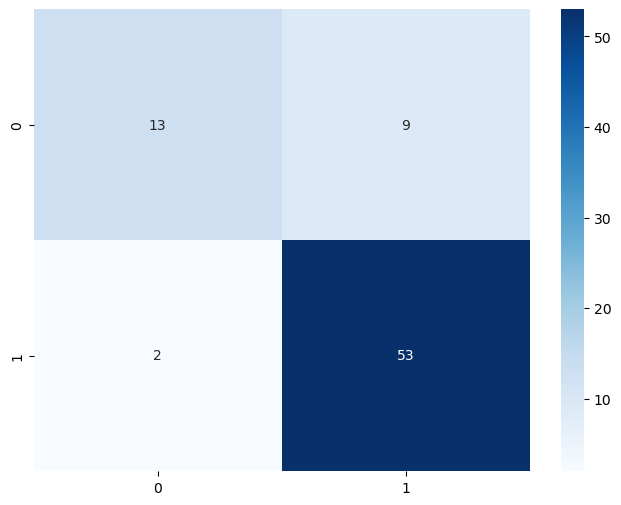

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt = 'd',cmap="Blues")

In [62]:
# classification Report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70        22
           1       0.85      0.96      0.91        55

    accuracy                           0.86        77
   macro avg       0.86      0.78      0.80        77
weighted avg       0.86      0.86      0.85        77



In [63]:
# ROC Curve and AUC

y_train_prob = model.predict_proba(x_train_scaled)[:,1]
y_train_prob

array([0.55804879, 0.91408691, 0.80837949, 0.73756195, 0.68620075,
       0.88588079, 0.90186285, 0.54724113, 0.88000115, 0.81062321,
       0.82694072, 0.92818917, 0.91256677, 0.91257781, 0.84448379,
       0.86453469, 0.87689782, 0.87183335, 0.92029107, 0.20347665,
       0.92259742, 0.88841405, 0.93036859, 0.88701325, 0.88177147,
       0.73482878, 0.9603205 , 0.52566189, 0.82663775, 0.83904616,
       0.424978  , 0.37590318, 0.92204957, 0.89585763, 0.10535944,
       0.90078185, 0.88857893, 0.10506878, 0.7351302 , 0.09215384,
       0.1931772 , 0.80057454, 0.3608842 , 0.90220947, 0.89801048,
       0.93169222, 0.12574976, 0.59975754, 0.68972067, 0.91256677,
       0.87192748, 0.92818917, 0.86523831, 0.82740394, 0.90350954,
       0.85419572, 0.89627226, 0.26891291, 0.93223501, 0.83062269,
       0.7578175 , 0.78365131, 0.93441925, 0.78170825, 0.07258617,
       0.11295663, 0.86684601, 0.51543009, 0.60942111, 0.34156499,
       0.91815818, 0.8922314 , 0.90234062, 0.86695478, 0.25638

In [65]:
fpr , tpr , thresholds = roc_curve(y_train, y_train_prob)

In [66]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.04545455, 0.09090909, 0.09090909, 0.09090909,
       0.13636364, 0.13636364, 0.22727273, 0.22727273, 0.27272727,
       0.27272727, 0.40909091, 0.40909091, 0.59090909, 0.59090909,
       0.68181818, 0.68181818, 1.        ])

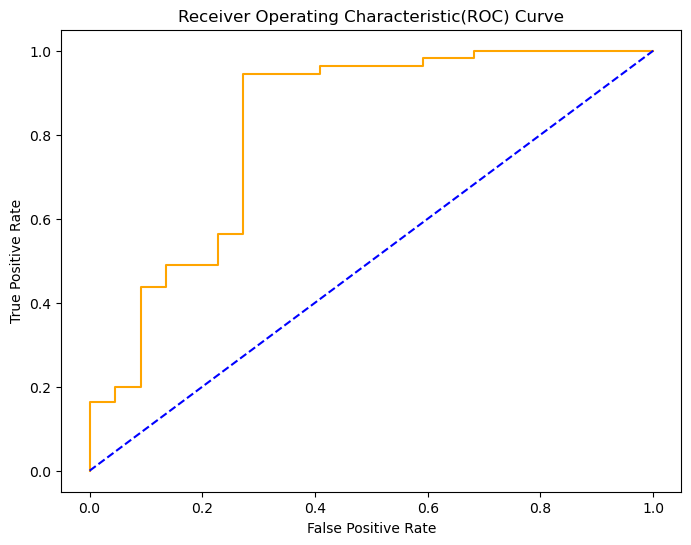

In [67]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'orange', label = 'ROC Curve')
plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.show()

In [68]:
#AUC
auc = roc_auc_score(y_train, y_train_prob)
auc

0.8181818181818181

In [69]:
# model traing
model = LogisticRegression(max_iter=1000)
model.fit(x_test_scaled , y_test)

LogisticRegression(max_iter=1000)

In [71]:
# evaluate model
y_test_pred = model.predict(x_test_scaled)
testing_accuracy = accuracy_score(y_test,y_test_pred)
print("Testing_Accuracy:",testing_accuracy)

Testing_Accuracy: 0.8713826366559485


In [72]:
# confusion matrix
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[ 39,  26],
       [ 14, 232]], dtype=int64)

<Axes: >

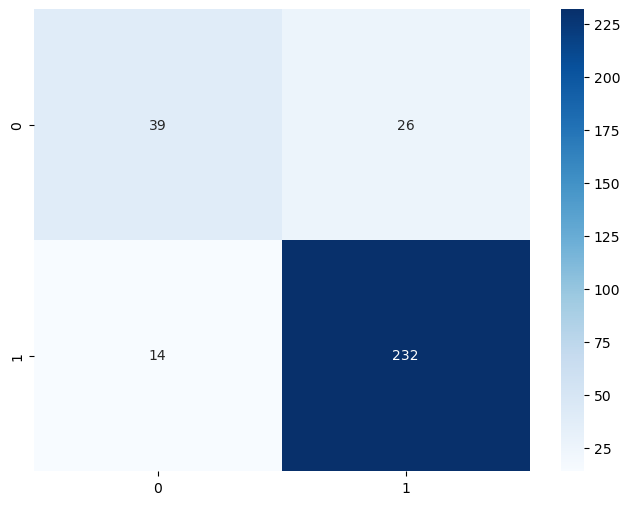

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt = 'd',cmap="Blues")

In [77]:
# classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        65
           1       0.90      0.94      0.92       246

    accuracy                           0.87       311
   macro avg       0.82      0.77      0.79       311
weighted avg       0.87      0.87      0.87       311



In [76]:
# ROC Curve and AUC

y_test_prob = model.predict_proba(x_test_scaled)[:,1]
y_test_prob

array([0.94379491, 0.20514696, 0.89105373, 0.37455912, 0.59024723,
       0.95446734, 0.46668839, 0.95689126, 0.92267521, 0.86621652,
       0.95195552, 0.88720099, 0.10943592, 0.09607318, 0.95565445,
       0.91628783, 0.88475905, 0.95996739, 0.91149779, 0.93438148,
       0.93845822, 0.94422463, 0.82586131, 0.92427293, 0.9545892 ,
       0.95160467, 0.95954287, 0.95753248, 0.24410795, 0.94422463,
       0.95968263, 0.4022681 , 0.9040306 , 0.85858263, 0.86535559,
       0.11679024, 0.46668839, 0.57460822, 0.93078538, 0.33217332,
       0.90466201, 0.23992573, 0.95538731, 0.94806652, 0.25956844,
       0.94950131, 0.8396814 , 0.9049685 , 0.80465096, 0.83629919,
       0.80721245, 0.9076238 , 0.96368372, 0.21338325, 0.260342  ,
       0.8868796 , 0.89303389, 0.78421044, 0.93766644, 0.26732597,
       0.89952648, 0.93171572, 0.96976795, 0.9284302 , 0.3727161 ,
       0.95342325, 0.14221171, 0.85858263, 0.9184971 , 0.93078538,
       0.24032347, 0.9076238 , 0.89537203, 0.82160391, 0.85217

In [78]:
fpr , tpr , thresholds = roc_curve(y_test, y_test_prob)

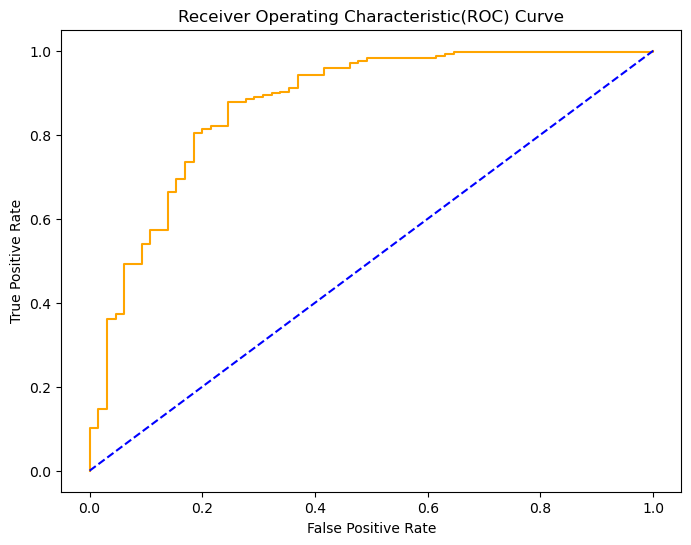

In [79]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'orange', label = 'ROC Curve')
plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.show()

In [80]:
#AUC
auc = roc_auc_score(y_test, y_test_prob)
auc

0.8701063164477798

In [ ]:
# Conclusion: Train_accuracy :0.8181818181818181
#              Test_accuracy :0.8701063164477798

